### Задание 1
Выберите наборы данных. которые можно интерпретировать, как временные ряды:
 - а) зависимость цены на недвижимость в конкретном регионе от времени,
 - б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
 - в) количество отказов компьютера,
 - г) число обращений в поликлинику по району,
 - д) координаты автобуса при движении по маршруту,
 - е) координаты фигуры нарушителя в файле видеофиксации охранной системы.


### Ответ:
Согласно определениею: "Временным рядом принято называть последовательно измеренные через некоторые (зачастую равные) промежутки времени данные". Исходя из этого:

- а) Да
- б) Да, если удастся привязать это к промежуткам времени
- в) Нет, поскольку нет понимания о промежутках времени и их частоте
- г) Нет, аналогично в). Если число обращений привяжут к промежуткам времени, то можно.
- д) Да, если удастся привязать это к промежуткам времени
- е) Нет. Опять же не сказано ничего о промежутках времени.

Примечание: в рассуждениях я четко привязывался к формулировке в каждом пункте. Там, где не сказано о том, что измерения измерялись последовательно и через промежутки времени (или о том, что их можно косвенно получить) мой ответ определялся как НЕТ.
Но следует отметить, что наиболее полная и соответствующая определению формулировка -- это исключительно пункт а).

### Задание 2
Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с
информацией о потреблении энергии в одном из районов Восточной Электросети США.
Сделайте описание особенностей этой выборки.
### Решение

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os
#print(os.listdir())

In [73]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [74]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [75]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


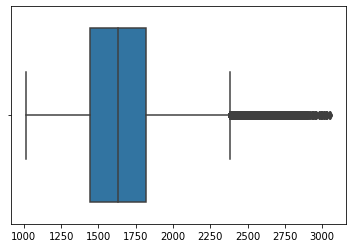

In [76]:
sns.boxplot(data.values)
#необходимо помнить, что в случае временного ряда это не совсем корректное исследование, 
#т.к. существование цикличности и тренда приводят к существенному изменению значений ряда во времен

In [77]:
#проверим пропуски
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

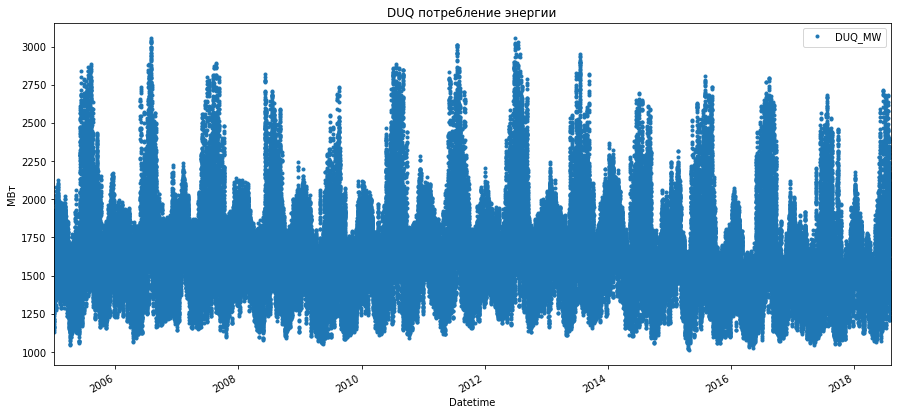

In [78]:
#посмотрим на графике
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

__Обсуждение визуализации__
Основные статистики показали, что пропусков нет
Визуальный анализ показывает что:
Предъявленные данные имеют циклы
В целом не наблюдается каких-либо аномалий и необычных скачков

## Задание 3
Прочитайте базу __Brent__ и сделайте ее перерасчет (ресемплинг) в представление по неделям, по месяцам.

In [79]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head(10)

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59
2019-08-26,58.26
2019-08-25,57.81
2019-08-23,58.94
2019-08-22,60.05


In [80]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
Значение    2667 non-null float64
dtypes: float64(1)
memory usage: 41.7 KB


In [81]:
brent_data.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


In [82]:
brent_data[brent_data['Значение'].isnull()].count()

Значение    0
dtype: int64

Text(0.5, 0, 't')

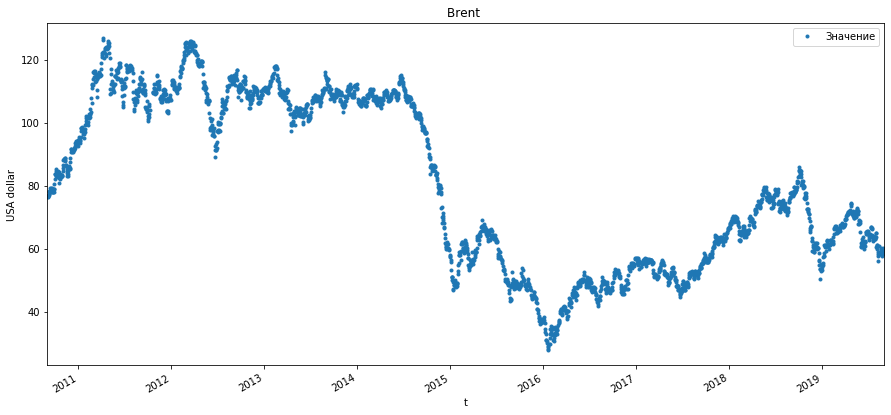

In [83]:
brent_data.plot(style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [84]:
brent_data['date'] = brent_data.index
brent_data['date'].describe()

count                    2667
unique                   2667
top       2016-11-14 00:00:00
freq                        1
first     2010-09-01 00:00:00
last      2019-09-01 00:00:00
Name: date, dtype: object

In [85]:
#2010-09-01 ... 2019-09-01

In [86]:
my_data_range_week = pd.date_range('2010-09-01','2019-09-01',freq='7D')
my_data_range_week

DatetimeIndex(['2010-09-01', '2010-09-08', '2010-09-15', '2010-09-22',
               '2010-09-29', '2010-10-06', '2010-10-13', '2010-10-20',
               '2010-10-27', '2010-11-03',
               ...
               '2019-06-26', '2019-07-03', '2019-07-10', '2019-07-17',
               '2019-07-24', '2019-07-31', '2019-08-07', '2019-08-14',
               '2019-08-21', '2019-08-28'],
              dtype='datetime64[ns]', length=470, freq='7D')

In [87]:
my_data_range_month = pd.date_range('2010-09-01','2019-09-01',freq='M')
my_data_range_month

DatetimeIndex(['2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30',
               ...
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31'],
              dtype='datetime64[ns]', length=108, freq='M')

делаем __resample__ по среднему

In [88]:
brent_data_W_mean = brent_data.resample("7D").mean()
brent_data_W_mean

,Значение
Дата,
2010-09-01,76.744286
2010-09-08,78.366667
2010-09-15,78.555000
2010-09-22,78.440000
2010-09-29,83.038333
...,...
2019-07-31,61.133333
2019-08-07,58.325000
2019-08-14,59.118333


In [89]:
brent_data_M_mean = brent_data.resample("M").mean()
brent_data_M_mean

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200
...,...
2019-05-31,69.966667
2019-06-30,62.980400
2019-07-31,64.292963


## Задание 4
Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для __Brent__.


In [90]:
#mean мы получили через resample выше, воспользуемся еще раз resample, но применим уже std 

In [91]:
brent_data_W_std = brent_data.resample("7D").std()
brent_data_M_std = brent_data.resample("M").std()

In [92]:
#рассчитаем для годовых
brent_data_Y_mean = brent_data.resample("Y").mean()
brent_data_Y_std = brent_data.resample("Y").std()

### средние по выборке

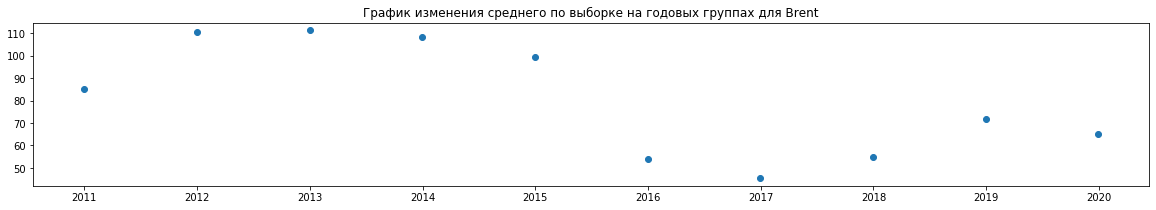

In [93]:
plt.figure(figsize=(20,3))
plt.title('График изменения среднего по выборке на годовых группах для Brent')
plt.plot(brent_data_Y_mean,'o')

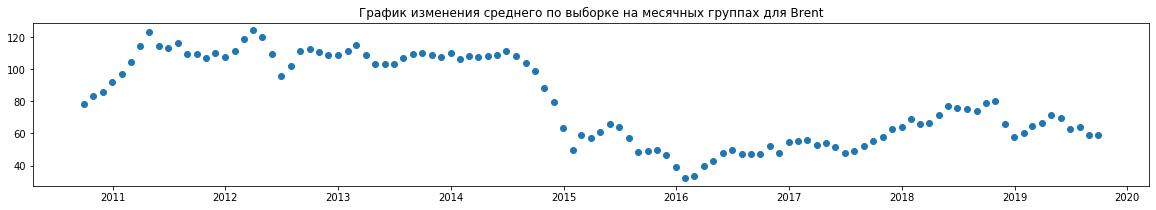

In [94]:
plt.figure(figsize=(20,3))
plt.title('График изменения среднего по выборке на месячных группах для Brent')
plt.plot(brent_data_M_mean,'o')

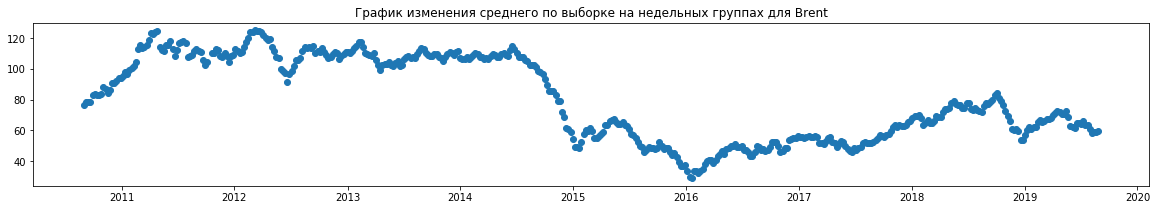

In [95]:
plt.figure(figsize=(20,3))
plt.title('График изменения среднего по выборке на недельных группах для Brent')
plt.plot(brent_data_W_mean,'o')

### средние отклонения по выборке:

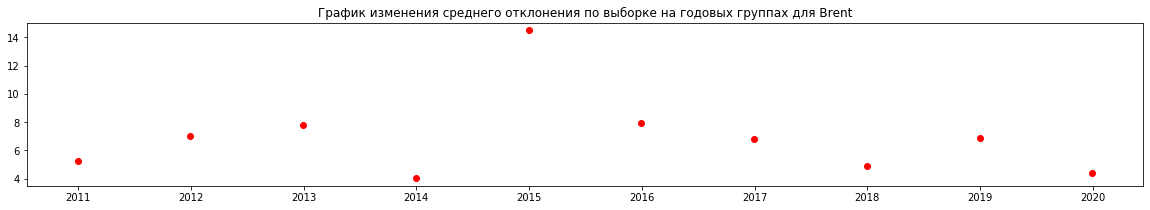

In [96]:
plt.figure(figsize=(20,3))
plt.title('График изменения среднего отклонения по выборке на годовых группах для Brent')
plt.plot(brent_data_Y_std,'o',color='red')

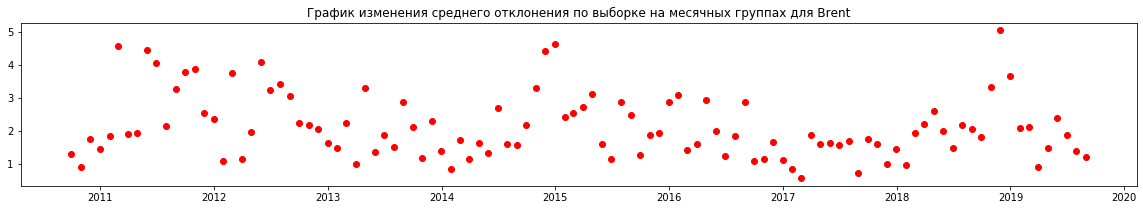

In [97]:
plt.figure(figsize=(20,3))
plt.title('График изменения среднего отклонения по выборке на месячных группах для Brent')
plt.plot(brent_data_M_std,'o',color='red')

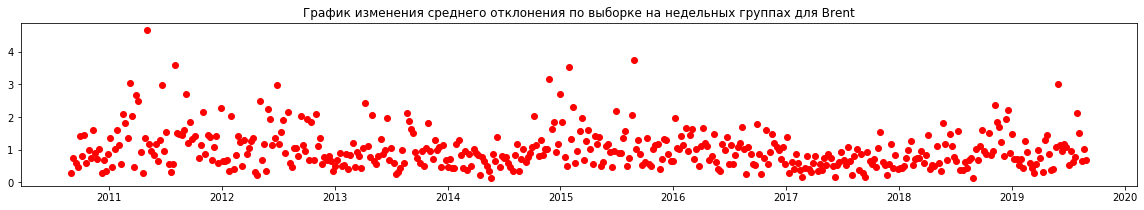

In [98]:
plt.figure(figsize=(20,3))
plt.title('График изменения среднего отклонения по выборке на недельных группах для Brent')
plt.plot(brent_data_W_std,'o',color='red')

## Задание 5
Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.
## Ответ

__среднее по выборке__:
Чем лучше детализация (меньше временной диапазон), тем сильнее наблюдается разброс в измерениях. Более укрупненный временной диапазон сглаживает эти моменты

__среднее отклонение по выборке__: чем лучше детализация, тем меньший разброс по среднеквадратичному отклонению по выборке